In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [3]:
bs = 64

In [4]:
path = Path('../input/chest_xray/chest_xray')
path.ls()

[PosixPath('../input/chest_xray/chest_xray/train'),
 PosixPath('../input/chest_xray/chest_xray/test'),
 PosixPath('../input/chest_xray/chest_xray/val'),
 PosixPath('../input/chest_xray/chest_xray/.DS_Store')]

torch.Size([3, 1225, 1632])


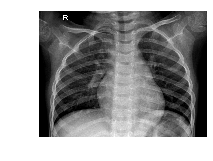

In [5]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [6]:
tfms = get_transforms()

In [7]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  valid_pct=0.2,
                                  size=256, bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

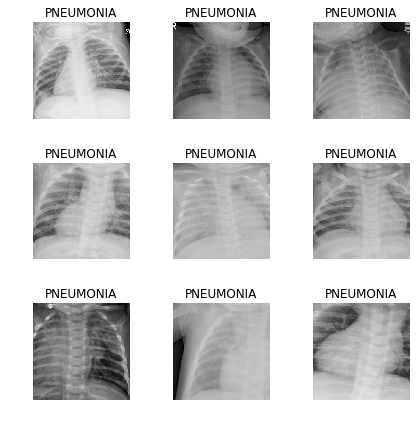

In [8]:
data.show_batch(3, figsize=(6,6))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4685, 1171)

> - we have a very small validation set so some augmentation is needed

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 145MB/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.463642,0.318031,0.064048,04:39
1,0.264333,0.200842,0.062340,04:45
2,0.184359,0.182682,0.051238,04:43
3,0.157451,0.192058,0.054654,04:43


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


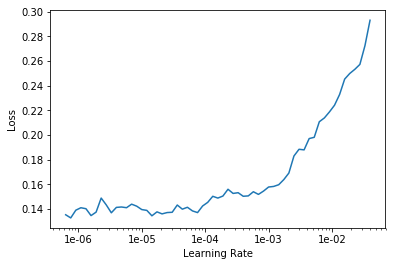

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(10, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.131313,0.173305,0.051238,04:51
1,0.124649,0.164076,0.051238,04:51
2,0.119637,0.151123,0.045260,04:56
3,0.111284,0.151167,0.043553,04:55
4,0.087750,0.234333,0.046968,04:48
5,0.071132,0.122242,0.035013,04:48
6,0.065401,0.103194,0.031597,04:51
7,0.049123,0.125808,0.031597,04:46
8,0.036115,0.122880,0.031597,04:47
9,0.031202,0.116027,0.031597,04:48


In [24]:
learn.save('final')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

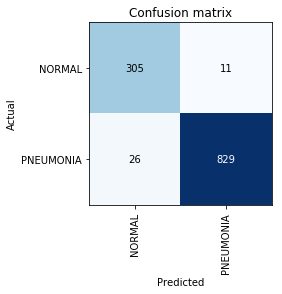

In [19]:
interp.plot_confusion_matrix()

In [20]:
from IPython.display import FileLink

In [28]:
FileLink('final.pth')

/kaggle/working/final.pth